# Sim Plotting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

In [10]:
DATA_DIR = '../data/'
QFN_1 = 'qfn_1.txt'
QFN_3 = 'qfn_3.txt'
QFN_7 = 'qfn_7.txt'

QFN_1_PATH = os.path.join(DATA_DIR, QFN_1)
QFN_3_PATH = os.path.join(DATA_DIR, QFN_3)
QFN_7_PATH = os.path.join(DATA_DIR, QFN_7)

df_qfn_1 = pd.read_csv(QFN_1_PATH, sep='\t')
df_qfn_3 = pd.read_csv(QFN_3_PATH, sep='\t')
df_qfn_7 = pd.read_csv(QFN_7_PATH, sep='\t')

df_qfn = [df_qfn_1, df_qfn_3, df_qfn_7]
qfn_idx = [0, 0, 0]
for i, df in enumerate(df_qfn):
    nan_rows = df[df['V(probe)'].isna()]
    index = nan_rows.index[1]
    qfn_idx[i] = index
    df_qfn[i]['time']     = pd.to_numeric(df['time'], errors='coerce')
    df_qfn[i]['V(probe)'] = pd.to_numeric(df['V(probe)'], errors='coerce')

SOIC_1 = 'soic_1.txt'
SOIC_3 = 'soic_3.txt'
SOIC_7 = 'soic_7.txt'

SOIC_1_PATH = os.path.join(DATA_DIR, SOIC_1)
SOIC_3_PATH = os.path.join(DATA_DIR, SOIC_3)
SOIC_7_PATH = os.path.join(DATA_DIR, SOIC_7)

df_soic_1 = pd.read_csv(SOIC_1_PATH, sep='\t')
df_soic_3 = pd.read_csv(SOIC_3_PATH, sep='\t')
df_soic_7 = pd.read_csv(SOIC_7_PATH, sep='\t')

df_soic = [df_soic_1, df_soic_3, df_soic_7]
soic_idx = [0, 0, 0]
for i, df in enumerate(df_qfn):
    nan_rows = df[df['V(probe)'].isna()]
    index = nan_rows.index[1]
    soic_idx[i] = index
    df_soic[i]['time']     = pd.to_numeric(df['time'], errors='coerce')
    df_soic[i]['V(probe)'] = pd.to_numeric(df['V(probe)'], errors='coerce')

Text(0.5, 0.01, 'Time [ns]')

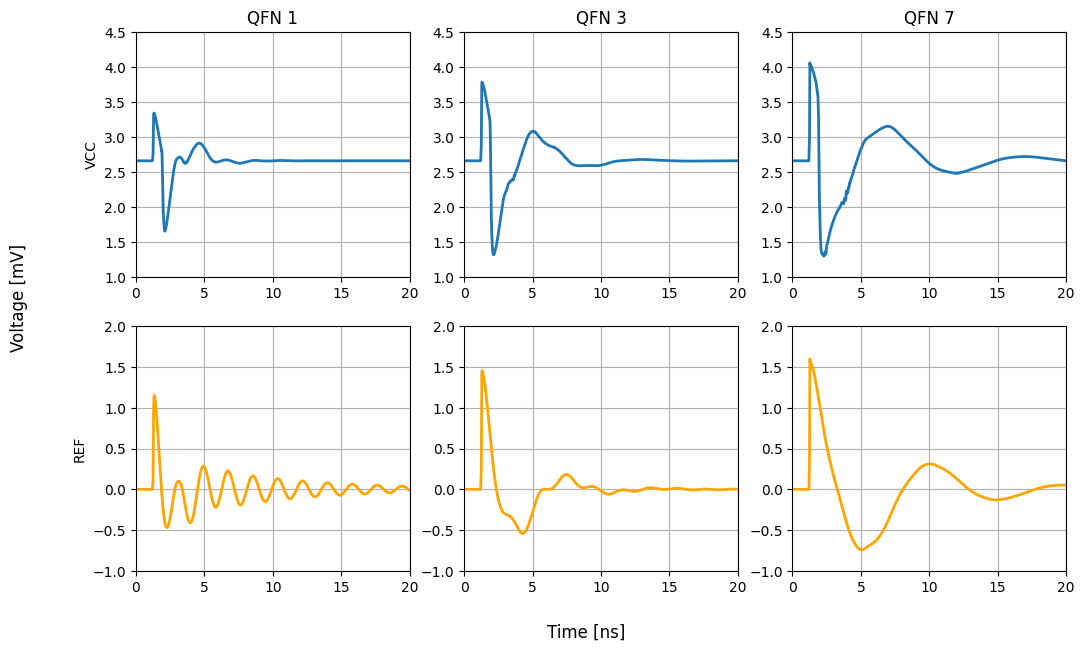

In [ ]:
fig, axs = plt.subplots(2, 3)
fig.set_figheight(7)
fig.set_figwidth(12)

axs[0,0].set_ylabel('VCC')
axs[1,0].set_ylabel('REF')

df = [df_qfn_1, df_qfn_3, df_qfn_7]
titles = [1, 3, 7]
for i, ax in enumerate(axs[0, :]):
    ax.plot(df[i]['time'][qfn_idx[i]:]*1e9, df[i]['V(probe)'][qfn_idx[i]:], linewidth=2, label='GND')
    ax.grid()
    ax.set_xlim(0, 20)
    ax.set_ylim(1, 4.5)
    ax.set_title(f'QFN {titles[i]}')

for i, ax in enumerate(axs[1, :]):
    ax.plot(df[i]['time'][1:qfn_idx[i]]*1e9, df[i]['V(probe)'][1:qfn_idx[i]], linewidth=2, color='orange')
    ax.grid()
    ax.set_xlim(0, 20)
    ax.set_ylim(-1, 2)

fig.supylabel('Voltage [mV]')
fig.supxlabel('Time [ns]')

Text(0.5, 0.01, 'Time [ns]')

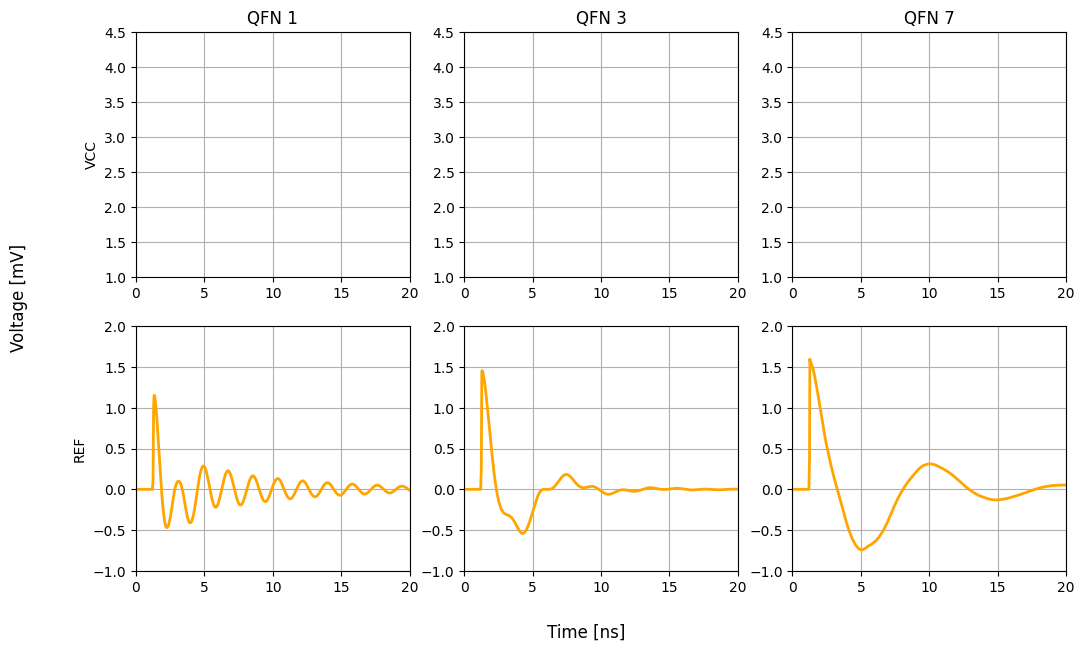

In [ ]:
fig, axs = plt.subplots(2, 3)
fig.set_figheight(7)
fig.set_figwidth(12)

axs[0,0].set_ylabel('VCC')
axs[1,0].set_ylabel('REF')

df = [df_soic_1, df_soic_3, df_soic_7]
titles = [1, 3, 7]
for i, ax in enumerate(axs[0, :]):
    ax.plot(df[i]['time'][soic_idx[i]:]*1e9, df[i]['V(probe)'][soic_idx[i]:], linewidth=2, label='GND')
    ax.grid()
    ax.set_xlim(0, 20)
    ax.set_ylim(1, 4.5)
    ax.set_title(f'SOIC {titles[i]}')

for i, ax in enumerate(axs[1, :]):
    ax.plot(df[i]['time'][1:soic_idx[i]]*1e9, df[i]['V(probe)'][1:soic_idx[i]], linewidth=2, color='orange')
    ax.grid()
    ax.set_xlim(0, 20)
    ax.set_ylim(-1, 2)

fig.supylabel('Voltage [mV]')
fig.supxlabel('Time [ns]')